# House Prices - Advanced Regression Techniques
Predict sales prices and practice feature engineering, RFs, and gradient boosting

# Loading the Dataset

Dataset to downloaded from the below link

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import pandas as pd
import numpy as np
from sklearn import model_selection
pd.pandas.set_option('display.max_columns',None)
train_data = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
test_data=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')

In [2]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

We can see from the Training DataFrame above that there are around 80 variables and 1460 observations. So we have suffcient data points to train the model and can expect a good score on the predictions.

# EDA
Our data is now in the form of a Data Frame. The initial step in EDA is to identify any missing data and examine how they relate to the target variable/feature. That analysis is usually useful in determining how to replace missing values.

<AxesSubplot:>

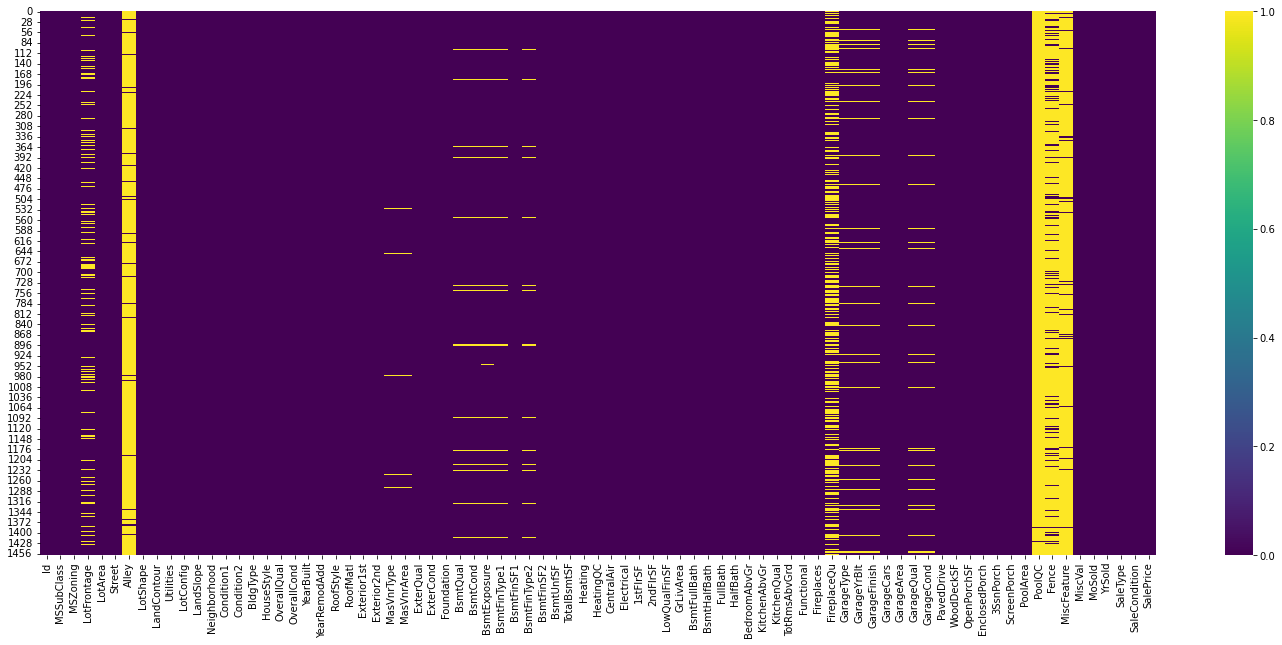

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
sns.heatmap(train_data.isnull(), cmap="viridis")

The missing or NaN values are indicated by the yellow streaks in the preceding image. Although the majority of the columns in the data are complete, a few rows have more than 75% of the values missing, such as alley, fence, and a few others.

In [4]:
Id=train_data['Id']

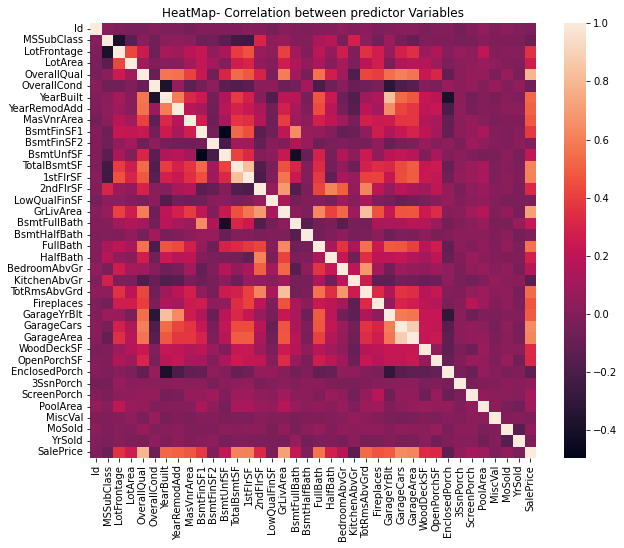

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr())
plt.title('HeatMap- Correlation between predictor Variables')
plt.show()

In [6]:
train_data.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr


OverallQual and GrLivArea are highly connected with the SalePrice, according to the preceding series. This suggests that individuals are prepared to pay more for homes with more ground living space and residences of higher quality. Furthermore, an increase in the quantity of high-quality properties in the neighbourhood will raise the area's average house sale price.

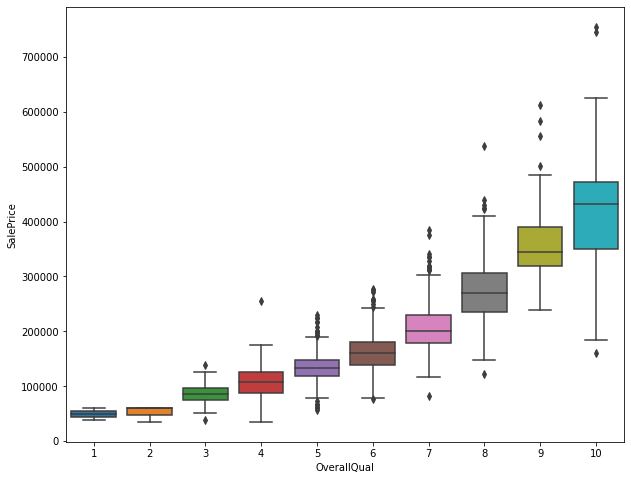

In [7]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='OverallQual', y='SalePrice',data=train_data )
plt.show()

The boxplot diagram clearly shows that overall quality is one of the primary factors influencing property prices.The median sale price had  simultaneously  increased as the Overallquality rating went up in the graph

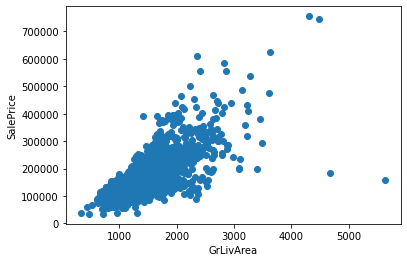

In [8]:
plt.scatter( x='GrLivArea',y='SalePrice',data=train_data)
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

The range of house sale prices has expanded as the ground living area has increased. Furthermore, we can detect some outliers on the right side of the graph.

Text(0, 0.5, 'SalePrice')

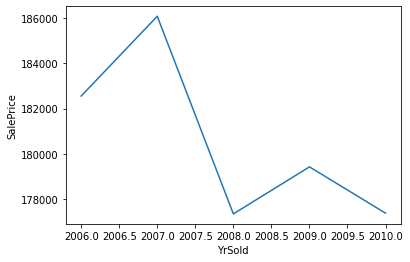

In [9]:
numerical_col=[col for col in train_data.columns if train_data[col].dtypes!='O']
numerical_col.remove('Id')
year_col=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
train_data.groupby('YrSold')['SalePrice'].mean().plot()
plt.ylabel('SalePrice')

We can observe from the graph above that the Saleprice trend has been irregular when compared to the year sold variable, implying that the selling price of a property has a poor relationship with the year in which it is sold.

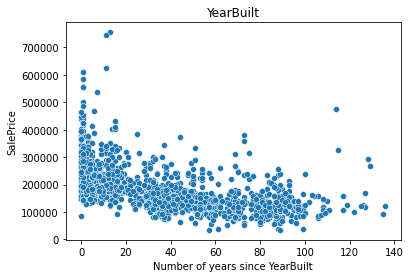

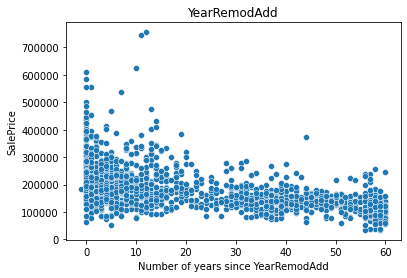

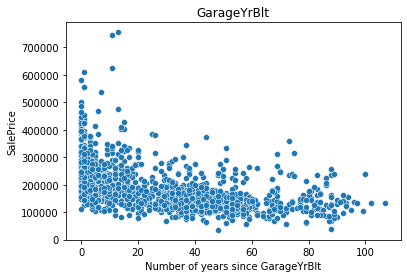

In [10]:
for i in year_col:
    data1=train_data.copy()
    if i!= 'YrSold':
        data1['new']=data1['YrSold']-data1[i]
        sns.scatterplot(x='new',y='SalePrice',data=data1)
        plt.xlabel('Number of years since'+' '+ i)
        plt.title(i)
        plt.show()
        

According to the three graphs above, older houses have a lower selling price than newly built houses. Furthermore, properties with freshly built garages or recently re-modified residences had higher selling values, and the price declined as the years since these changes or garage construction increased.

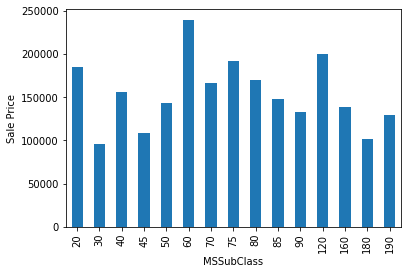

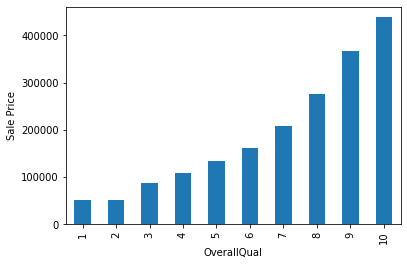

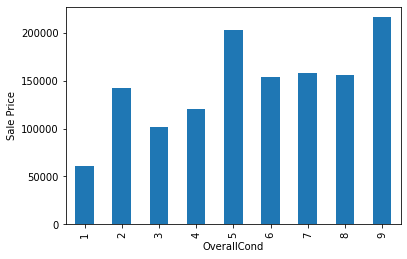

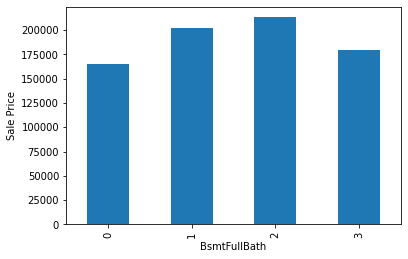

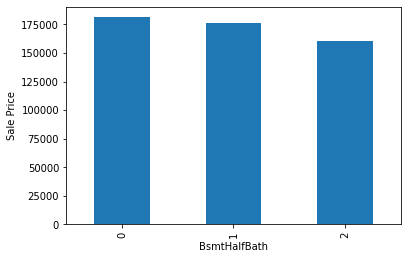

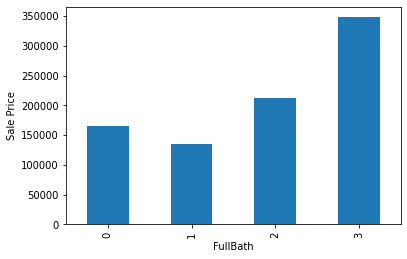

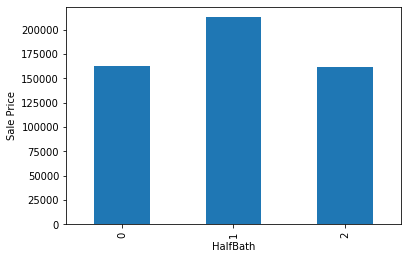

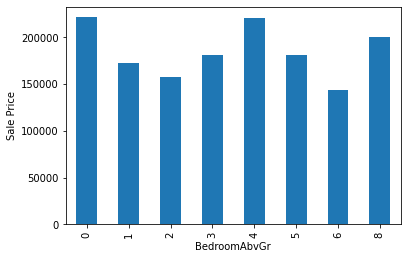

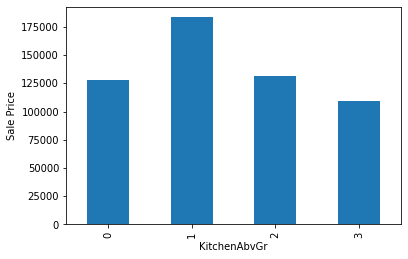

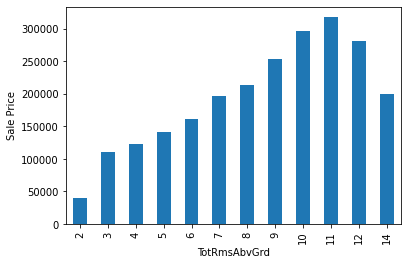

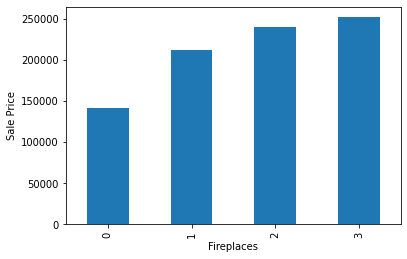

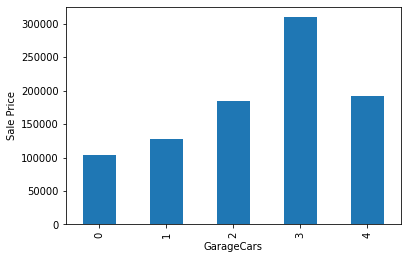

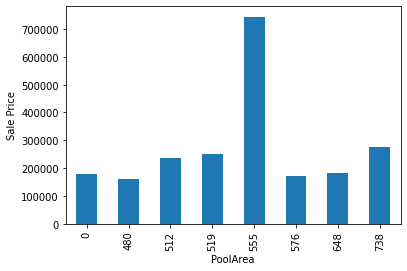

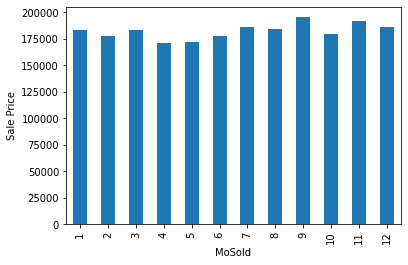

In [11]:
discrete_col=[col for col in numerical_col if len(train_data[col].value_counts())< 20 and col not in year_col]
for i in discrete_col:
    df1=train_data.copy()
    df1.groupby(i)['SalePrice'].mean().plot.bar()
    plt.ylabel('Sale Price')
    plt.show()

We plotted the SalePrice versus category factors in the figures above. Some attributes, such as OverallQuality, TotalRoomsAboveGround, Fireplaces, and GarageCars, have a considerable relationship with sales prices.

<AxesSubplot:ylabel='YrSold,MoSold'>

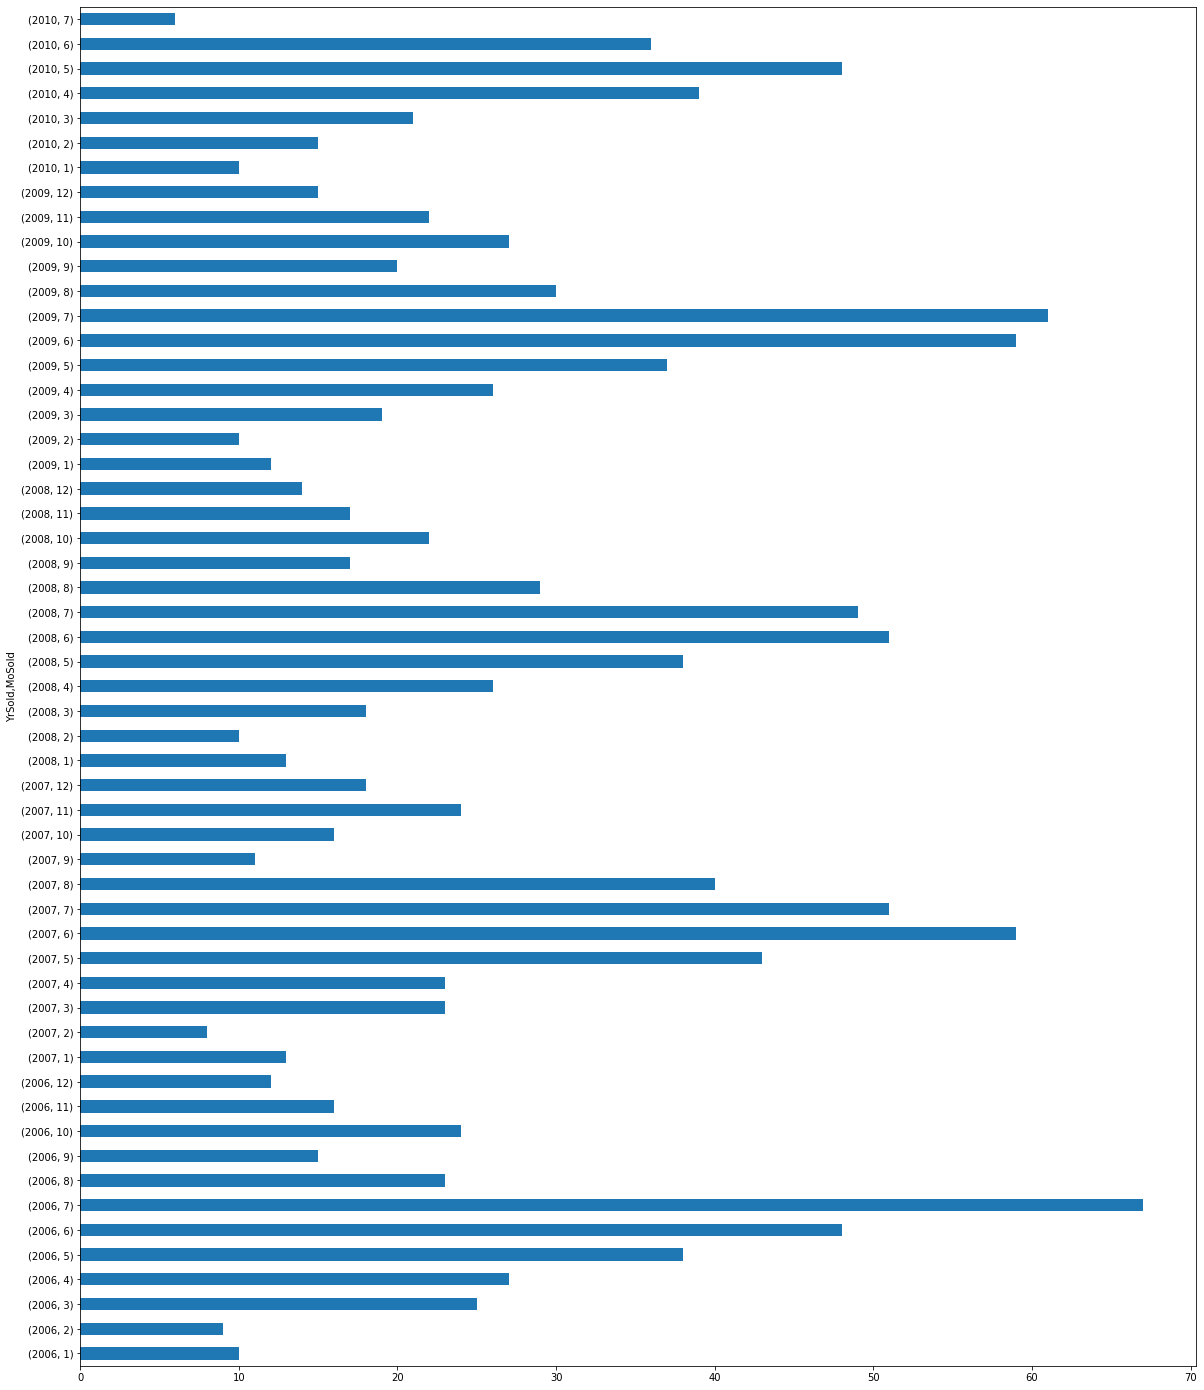

In [12]:
train_data.groupby(['YrSold','MoSold']).count()['SalePrice'].plot(kind='barh',figsize=(20,25))

In the above barchart we have plotted the number of houses sold in each month of the respective year starting from January 2006 to July 2011.If clearly observed, there is a trend in the above graph the number of houses sold have dramatically increased in the month of may, june and july in every year.

# Feature Engineering

## Imputing Missing Values

As stated in the dataset description in kaggle, NA values in numerous fields such as Alley,Fence,FireplaceQu...etc imply that these features or amenities are lacking in the home, thus I replaced them with a 'None' value if it is categorical and 0 incase the variable is numerical.

In [13]:
train_data["MiscFeature"] = train_data["MiscFeature"].fillna("None")
train_data["Alley"] = train_data["Alley"].fillna("None")
train_data["Fence"] = train_data["Fence"].fillna("None")
train_data["FireplaceQu"] = train_data["FireplaceQu"].fillna("None")

test_data["MiscFeature"] = test_data["MiscFeature"].fillna("None")
test_data["Alley"] = test_data["Alley"].fillna("None")
test_data["Fence"] = test_data["Fence"].fillna("None")
test_data["FireplaceQu"] = test_data["FireplaceQu"].fillna("None")

train_data["MasVnrArea"] = train_data["MasVnrArea"].fillna(0)
test_data["MasVnrArea"] = test_data["MasVnrArea"].fillna(0)
train_data["MasVnrType"] = train_data["MasVnrType"].fillna("None")
test_data["MasVnrType"] = test_data["MasVnrType"].fillna("None")
train_data["PoolQC"] = train_data["PoolQC"].fillna("None")
test_data["PoolQC"] = test_data["PoolQC"].fillna("None")

In [14]:
Basement_cat = ("BsmtQual" , "BsmtCond", "BsmtExposure" , "BsmtFinType1" , "BsmtFinType2")
for i in Basement_cat:
    train_data[i] = train_data[i].fillna("None")
    test_data[i] = test_data[i].fillna("None")
    
Basement_num = ("BsmtFinSF1" , "BsmtFinSF2" , "BsmtUnfSF", "TotalBsmtSF" ,
"BsmtFullBath" , "BsmtHalfBath")
for i in Basement_num:
    train_data[i] = train_data[i].fillna(0)
    test_data[i] = test_data[i].fillna(0)

In [15]:
garage_cat= ("GarageType" , "GarageFinish" , "GarageQual" ,"GarageCond")
for i in garage_cat:
    train_data[i] = train_data[i].fillna('None')
    test_data[i] = test_data[i].fillna('None')
    
garage_num = ("GarageYrBlt" , "GarageArea" , "GarageCars")
for i in garage_num:
    train_data[i] = train_data[i].fillna(0)
    test_data[i] = test_data[i].fillna(0)
    

In [16]:
train_data["LotFrontage"] = train_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))
test_data["LotFrontage"] = test_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


In the above cell, I grouped the columns based on their Neighborhood and then used the median value to fill in the empty values in the LotFrontage column, because properties in similar neighbourhoods tend to have the same LotFrontage distance.

In [17]:
numeric_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
year_col=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']

In [18]:
print('Values along with Count in the Categorical Columns','\n')
for i in categorical_cols:
    print(i)
    print(train_data[i].value_counts(),'\n')  

Values along with Count in the Categorical Columns 

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64 

Alley
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64 

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOT

In [19]:
train_data.drop(['Utilities','Street',"PoolQC"], axis = 1,inplace=True)
test_data.drop(['Utilities','Street',"PoolQC"], axis = 1,inplace=True)


I removed the utilities,PoolQc and street features since more than 95 percent of the values in it had a single value, thus adding these features to the model is pointless due to the lack of variety in values.

In [20]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,None,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,None,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,None,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,None,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,None,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,None,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,None,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,MnPrv,None,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,None,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,None,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,None,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,None,None,0,4,2010,WD,Normal,142125


In [21]:
missing_counts = train_data.isnull().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

Electrical    1
dtype: int64

In [22]:
missing_counts = test_data.isna().sum().sort_values(ascending=False)
missing_counts[missing_counts > 0]

MSZoning       4
Functional     2
Exterior2nd    1
SaleType       1
Exterior1st    1
KitchenQual    1
dtype: int64

We could see that there are few more missing values in training and testing data to deal with. Below, I have used the simple imputer class with mean to deal with the numerical missing values and mode for the categorical ones.The SimpleImputer class provides fundamental mechanisms for filling in missing values. Missing values can be imputed using a constant value supplied, or by utilising the statistics (mean, median, or most common) of each column in which the missing values are placed.

Numerical columns

In [23]:
from sklearn.impute import SimpleImputer
numeric_cols.remove('SalePrice')

In [24]:
imputer1 = SimpleImputer(strategy='mean')
imputer1.fit(train_data[numeric_cols])
train_data[numeric_cols] = imputer1.transform(train_data[numeric_cols])
test_data[numeric_cols] = imputer1.transform(test_data[numeric_cols])

Categorical columns

In [25]:
from sklearn.impute import SimpleImputer
categorical_cols = train_data.select_dtypes(include=['object']).columns.tolist()
imputer1 = SimpleImputer(strategy='most_frequent')
imputer1.fit(train_data[categorical_cols])
train_data[categorical_cols] = imputer1.transform(train_data[categorical_cols])
test_data[categorical_cols] = imputer1.transform(test_data[categorical_cols])

# Target variable transformation

The term "normality" refers to the fact that the distribution of variables follows a normal pattern.
Drawing a Histogram and a QQ plot is the simplest technique to check for normality.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

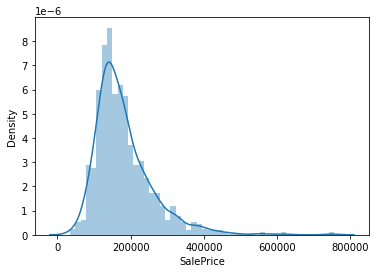

In [26]:
sns.distplot(train_data['SalePrice'],bins=50)

The pricing is right skewed, as shown in the graph above. Skewed data makes it harder for a model to detect a correct pattern in the data, which is why we must convert skew data to normal or Gaussian data. The log-transformation effectively eliminates 
skewness.

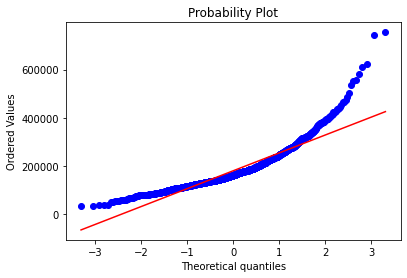

In [27]:
from scipy import stats
stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

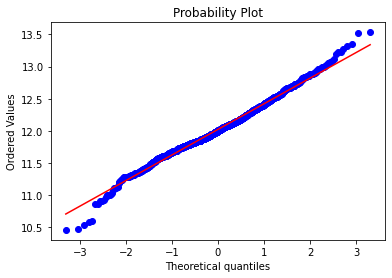

In [28]:
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])
from scipy import stats
stats.probplot(train_data['SalePrice'], plot=plt)
plt.show()

In [29]:
Tvariable=train_data['SalePrice']
train_data.drop('SalePrice',axis=1,inplace=True)

#  ADDITIONAL FEATURES

In [30]:
yr_col=['YearBuilt','YearRemodAdd']
for i in yr_col:
        train_data['NYS'+i]=train_data['YrSold']-train_data[i]
        test_data['NYS'+i]=test_data['YrSold']-test_data[i]

I've included two new fields to the dataset: the number of years since the remodification and the year the home was built. As we can see from the figures in the EDA section, these two will aid the model in properly anticipating prices.

# Transforming  numerical variables that are categorical

Some of the numerical features are categorical, therefore I changed them to strings so that they would be taken into account when encoding the categorical columns. To identify these columns, I first built a list of numerical columns and then filtered the list for columns with fewer than 30 different values in the respective columns and that are not in the Year list.

In [31]:
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
year_col=['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold']
num_discrete_col=[col for col in num_cols if len(train_data[col].value_counts())<30 and col not in year_col]
train_data[num_discrete_col]

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60.0,7.0,5.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2.0,0.0,0.0,0.0,2.0
1,20.0,6.0,8.0,0.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,2.0,0.0,0.0,0.0,5.0
2,60.0,7.0,5.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2.0,0.0,0.0,0.0,9.0
3,70.0,7.0,5.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,3.0,0.0,0.0,0.0,2.0
4,60.0,8.0,5.0,0.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,3.0,0.0,0.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,6.0,5.0,0.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2.0,0.0,0.0,0.0,8.0
1456,20.0,6.0,6.0,0.0,1.0,0.0,2.0,0.0,3.0,1.0,7.0,2.0,2.0,0.0,0.0,0.0,2.0
1457,70.0,7.0,9.0,0.0,0.0,0.0,2.0,0.0,4.0,1.0,9.0,2.0,1.0,0.0,0.0,2500.0,5.0
1458,20.0,5.0,6.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1.0,0.0,0.0,0.0,4.0


In [32]:
train_data["MSSubClass"] = train_data["MSSubClass"].apply(str)
test_data["MSSubClass"] = test_data["MSSubClass"].apply(str)
train_data["YrSold"] = train_data["YrSold"].apply(str)
test_data["YrSold"] = test_data["YrSold"].apply(str)
train_data["MoSold"] = train_data["MoSold"].apply(str)
test_data["MoSold"] = test_data["MoSold"].apply(str)

From the final list MSSubClass is categorical as its values relate to the type of dwelling involved in the sale. Moreover, Yearsold has only 4 disticnt values and MonthSold indicates the month in which the house was sold

# Outliers 

The statistics and distribution of the input variables affect machine learning algorithms. Outliers in data can sabotage and mislead the training process. Longer training times, fewer accurate models, and, ultimately, inferior results follow.

I separated the list of numerical columns into two categories: discrete and continuous. All columns with fewer than 15 different values were placed in the discrete column list, while the remaining were placed in the continuous column list. Following that, I created distribution charts for continuous columns.

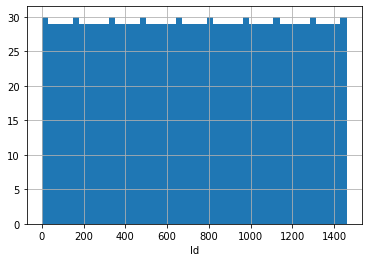

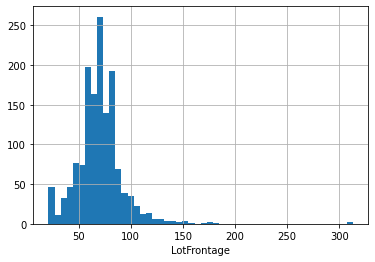

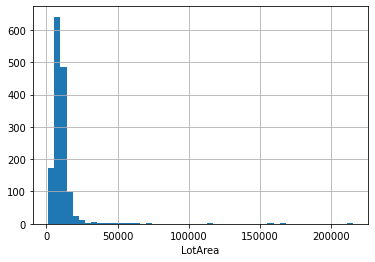

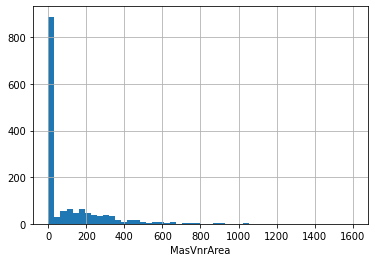

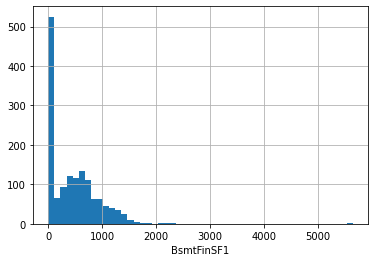

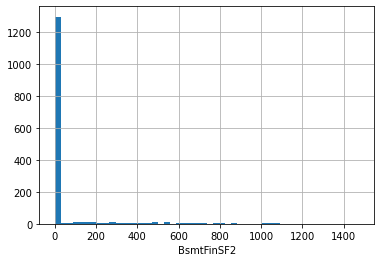

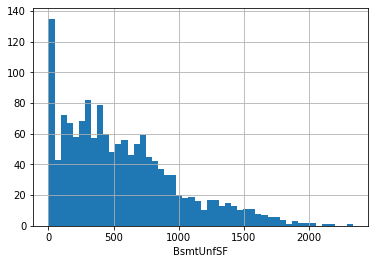

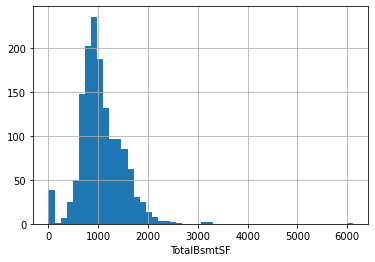

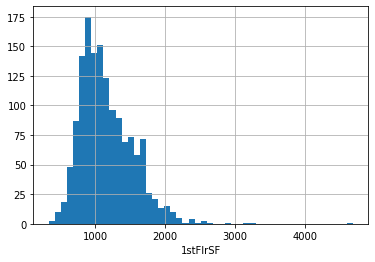

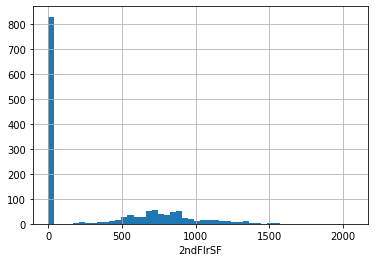

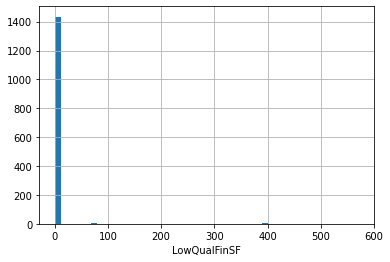

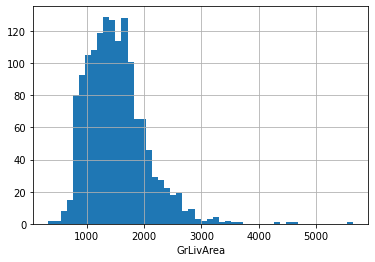

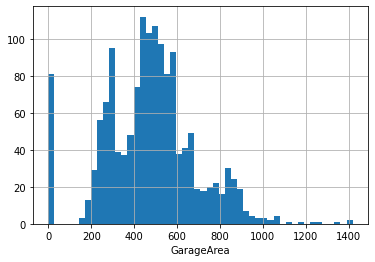

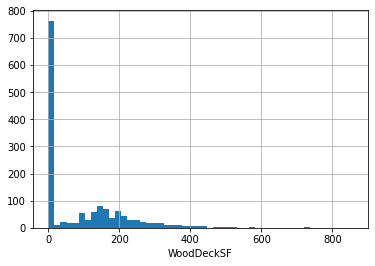

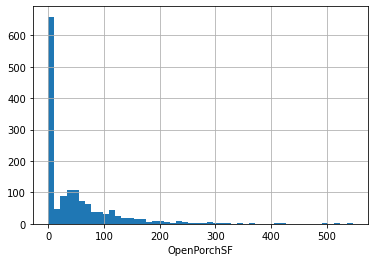

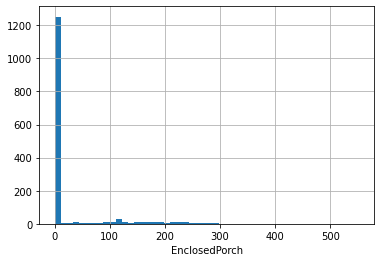

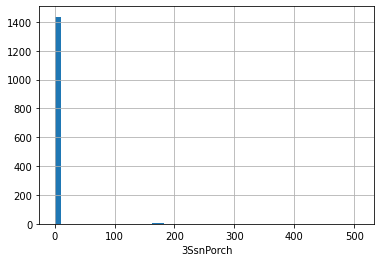

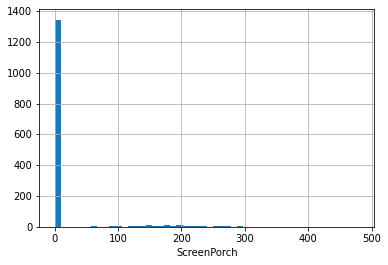

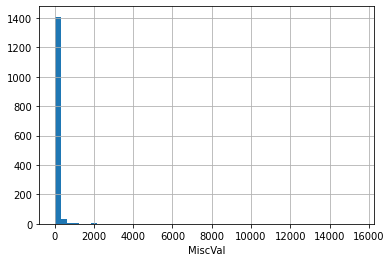

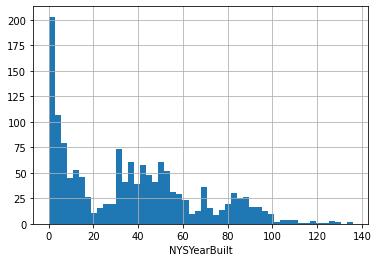

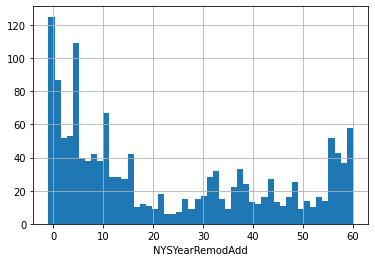

In [33]:
numerical_col=[col for col in train_data.columns if train_data[col].dtypes!='O']
discrete_col=[col for col in numerical_col if len(train_data[col].value_counts())< 15 and col not in year_col]
cont_col=[col for col in numerical_col if col not in discrete_col+year_col ]
for i in cont_col:
    df1=train_data.copy()
    df1[i].hist(bins=50)
    plt.xlabel(i)
    plt.show()

In [34]:
l=['LotFrontage','LotArea','BsmtUnfSF','TotalBsmtSF','1stFlrSF','GrLivArea','GarageArea']
for i in l:
    Q1=train_data[i].quantile(0.25)
    Q3=train_data[i].quantile(0.75)
    IQR=Q3-Q1
    W1=Q1-(1.5*IQR)
    W2=Q3+(1.5*IQR)
    for x in train_data[i]:
        if x<W1:
            train_data[i].replace(x,W1,inplace=True)
        if x>W2:
            train_data[i].replace(x,W2,inplace=True)

After evaluating the distributions and the unique values in continuous columns, I have chosen a few columns that may include outliers. I later substituted the outliers with the corresponding whisker values.

# Skewness

Because it must cope with rare occurrences on extreme values, skewed data reduces the model's capacity to explain typical cases.There are statistical models that are resistant to outliers, such as Tree-based models, however this limits the ability to test alternative models. As a result, it is necessary to convert the skewed data into something like a Gaussian or Normal distribution. This will enable us to test a greater number of statistical models.

To cope with the skweness in the data, I applied the boxcox transformation below.

In [35]:
cdata=pd.concat([train_data,test_data])
numerical_col=[col for col in train_data.columns if train_data[col].dtypes!='O']
skew=cdata[numerical_col].skew().sort_values()
skew_score=pd.DataFrame({'Skew' :skew})
skew_score

,Skew
GarageYrBlt,-3.908213
YearBuilt,-0.600114
YearRemodAdd,-0.451252
GarageCars,-0.219694
Id,0.000000
GarageArea,0.127085
FullBath,0.167692
OverallQual,0.197212
BedroomAbvGr,0.326492
LotFrontage,0.388543


In [36]:
skewness_p = skew_score[(skew_score['Skew']) > 0.75]
skewness_n = skew_score[(skew_score['Skew']) < -0.75]

from scipy.special import boxcox1p
skewed_features_p = skewness_p.index
lam = 0.17
for feat in skewed_features_p:
    cdata[feat] = boxcox1p(cdata[feat], lam)
    
skewed_features_n = skewness_n.index
lam=2    
for feat in skewed_features_n:
    cdata[feat] = boxcox1p(cdata[feat], lam)
    
train_data=cdata.iloc[0:1460]
test_data=cdata.iloc[1460:]

# Scaling Numerical Values

Feature scaling is a technique for standardising the independent characteristics included in data within a specific range. If feature scaling is not performed, a machine learning algorithm will tend to weight bigger values as higher and consider smaller values as lower, regardless of the unit of measurement.I used robustscaler to scale the data since there were many columns with outliers, and robustscaler performs well when scaling data with a high number of outliers.This Scaler eliminates the median and scales the data based on the quantile range . The IQR is the difference between the first and third quartiles (25th and 75th quantiles) (75th quantile). Because this Scaler's centering and scaling statistics are based on percentiles, they are unaffected by a small number of large marginal outliers.

In [37]:
num_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
train_data[num_cols].describe().loc[['min', 'max']]

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,NYSYearBuilt,NYSYearRemodAdd
min,1.0,30.0,14.470260,1.0,1.0,1872.0,1950.0,0.000000,0.000000,0.000000,0.00000,42.0,9.923164,0.000000,0.00000,9.923164,0.0,0.000000,0.0,0.0,0.0,0.000000,1.207899,0.0,0.0,0.0,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,-1.0
max,1460.0,110.0,25.134669,10.0,9.0,2010.0,2010.0,14.738072,19.664297,14.452719,14.92126,2052.0,15.808451,15.651574,11.43324,16.722449,3.0,1.207899,3.0,2.0,8.0,1.563274,3.439164,3.0,2022060.0,4.0,938.25,12.663376,11.302419,11.328974,11.088087,10.925636,12.198572,24.450428,136.0,60.0


In [38]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(pd.concat([train_data[num_cols], test_data[num_cols]]))
train_data[num_cols] = scaler.transform(train_data[num_cols])
test_data[num_cols] = scaler.transform(test_data[num_cols])

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


# Encode Categorical Columns

All input and output variables in machine learning models must be numeric. This implies that if your data contains categorical data, you must convert it to numbers before fitting and evaluating a model. When working with categorical data for machine learning algorithms, encoding is a needed pre-processing step.Some of the categorical columns had order, so I used label encoding on those, and the rest columns were encoded with getdummies function.

## LABEL ENCODING

In [39]:
cdata=pd.concat([train_data,test_data])
cdata['LotShape']=cdata['LotShape'].map({'Reg':3,'IR3':0,'IR2':1,'IR1':2})
cdata['LandSlope']=cdata['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
cdata['ExterQual']=cdata['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
cdata['ExterCond']=cdata['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
cdata['BsmtQual']=cdata['BsmtQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
cdata['BsmtCond']=cdata['BsmtCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
cdata['BsmtExposure']=cdata['BsmtExposure'].map({'None':0,'No':1,'Mn':2,'Av':3,'Gd':4})
cdata['BsmtFinType1']=cdata['BsmtFinType1'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
cdata['BsmtFinType2']=cdata['BsmtFinType2'].map({'None':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
cdata['HeatingQC']=cdata['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
cdata['KitchenQual']=cdata['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
cdata['FireplaceQu']=cdata['FireplaceQu'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
cdata['GarageFinish']=cdata['GarageFinish'].map({'None':0,'Unf':1,'RFn':2,'Fin':3})
cdata['GarageQual']=cdata['GarageQual'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
cdata['GarageCond']=cdata['GarageCond'].map({'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
cdata['YrSold']=cdata['YrSold'].map({'2006.0':0,'2007.0':1,'2008.0':2,'2009.0':3,'2010.0':4})
cdata['MoSold']=cdata['MoSold'].apply(float).apply(int)
cdata['PavedDrive']=cdata['PavedDrive'].map({'N':0,'P':1,'Y':2})
cdata['Fence']=cdata['Fence'].map({'None':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})

In [40]:
dataf=pd.get_dummies(cdata, drop_first=True)
dataf.drop(['Id'],axis=1,inplace=True)
ftrain_data=dataf.iloc[0:1460]
ftest_data=dataf.iloc[1460:]

# Model Building

In [41]:
train_inputs = ftrain_data.copy()
test_inputs = ftest_data.copy()

In [42]:
train_inputs['Id']=Id

# Hyper parameter optimization

The hyperparameter configuration becomes more complicated as the model becomes more sophisticated. Hyperparameter combinations can have a big influence on the model's performance.

Initially I have experimented with leastsqaures,lasso and ridge regression and finally ended up picking ridge as it has performed well and had great accuracy compared to the other two.
The rest two models are XGboost and gradient boosting regressor. I have performed the hyper parameter optimization on these models using the RandomizedSearchCV

In [43]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RandomizedSearchCV

# MODEL-1 RIDGE REGRESSION

## Regularization
Value of alpha, which is a Ridge hyperparameter, which means that they are not learnt automatically by the model and must be adjusted manually. 
We use RandomizedSearchCV to determine the best alpha for Ridge Regularization.

In [44]:
from sklearn.linear_model import Ridge
param_grid={}
param_grid['alpha'] = np.arange(0, 20, 0.1)
model=Ridge()
searcher=RandomizedSearchCV(model,param_grid,n_iter=2,scoring='neg_mean_squared_error',verbose=1,cv=10)
searcher.fit(ftrain_data, Tvariable)
print(searcher.best_params_)
print(searcher.best_score_)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'alpha': 10.200000000000001}
-0.014981461017819586


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.5s finished


In [45]:
# Let us explore the coefficients for each of the independent attributes
ridge_model = Ridge(alpha=9)
ridge_model.fit(ftrain_data,Tvariable)
weights = ridge_model.coef_
weights_df = pd.DataFrame({
    'columns': ftrain_data.columns,
    'weight': weights
}).sort_values('weight', ascending=False)
weights_df=pd.concat([weights_df.iloc[0:4],weights_df.iloc[216:]])

<AxesSubplot:xlabel='weight', ylabel='columns'>

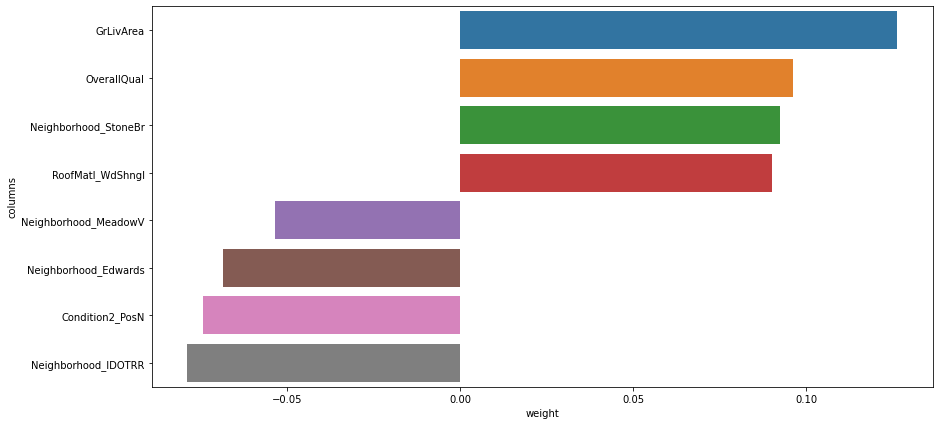

In [46]:
plt.figure(figsize=(14,7))
sns.barplot(x='weight',y='columns',data=weights_df)


I made a graph showing the variable coefficients with the greatest magnitude. As anticipated, the model gave higher weightage to Groundliving area and OverallQuality.

# MODEL-2 XGBOOST

XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. It is not always adequate to depend just on the outcomes of a single machine learning model. Ensemble learning provides a methodical approach to combining the predictive capacity of numerous learners. The end result is a single model that aggregates the output of numerous models.

In [47]:
n_estimators = [850,900,950]
max_depth = [2, 3, 5, 10, 15]
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    }

from xgboost import XGBRegressor
my_model = XGBRegressor()
XGB=RandomizedSearchCV(my_model,param_grid,n_iter=5,scoring='neg_mean_squared_error',verbose=2,cv=10)
XGB.fit(ftrain_data,Tvariable)
print(XGB.best_params_)
print(XGB.best_score_)


Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] n_estimators=850, min_child_weight=4, max_depth=3, learning_rate=0.2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=850, min_child_weight=4, max_depth=3, learning_rate=0.2, total=  10.1s
[CV] n_estimators=850, min_child_weight=4, max_depth=3, learning_rate=0.2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s remaining:    0.0s


[CV]  n_estimators=850, min_child_weight=4, max_depth=3, learning_rate=0.2, total=   5.6s
[CV] n_estimators=850, min_child_weight=4, max_depth=3, learning_rate=0.2 
[CV]  n_estimators=850, min_child_weight=4, max_depth=3, learning_rate=0.2, total=   6.2s
[CV] n_estimators=850, min_child_weight=4, max_depth=3, learning_rate=0.2 
[CV]  n_estimators=850, min_child_weight=4, max_depth=3, learning_rate=0.2, total=   5.6s
[CV] n_estimators=850, min_child_weight=4, max_depth=3, learning_rate=0.2 
[CV]  n_estimators=850, min_child_weight=4, max_depth=3, learning_rate=0.2, total=   6.1s
[CV] n_estimators=850, min_child_weight=4, max_depth=3, learning_rate=0.2 
[CV]  n_estimators=850, min_child_weight=4, max_depth=3, learning_rate=0.2, total=   7.0s
[CV] n_estimators=850, min_child_weight=4, max_depth=3, learning_rate=0.2 
[CV]  n_estimators=850, min_child_weight=4, max_depth=3, learning_rate=0.2, total=   6.1s
[CV] n_estimators=850, min_child_weight=4, max_depth=3, learning_rate=0.2 
[CV]  n_es

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  7.4min finished


{'n_estimators': 950, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1}
-0.015847832216791445


# MODEL-3 GRADIENT BOOSTING REGRESSOR

Gradient boosting creates an additive mode by employing several fixed-size decision trees as weak learners or weak predictive models. The parameter n estimators determines how many decision trees will be utilised in the boosting phases. The gradient boosting approach is useful for training models for both regression and classification problems. Boosting Gradients To fit the model that predicts the continuous value, the regression procedure is utilised.

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
my_model2=GradientBoostingRegressor()

In [49]:
n_estimators = [850,900,950]
max_depth = [2, 3, 5, 10, 15]
learning_rate=[0.05,0.1,0.15,0.20]

param_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate
    }

GBR=RandomizedSearchCV(my_model2,param_grid,n_iter=5,scoring='neg_mean_squared_error',verbose=2,cv=10)
GBR.fit(ftrain_data,Tvariable)
print(GBR.best_params_)
print(GBR.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] n_estimators=900, max_depth=3, learning_rate=0.2 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . n_estimators=900, max_depth=3, learning_rate=0.2, total=   7.4s
[CV] n_estimators=900, max_depth=3, learning_rate=0.2 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.4s remaining:    0.0s


[CV] . n_estimators=900, max_depth=3, learning_rate=0.2, total=   7.8s
[CV] n_estimators=900, max_depth=3, learning_rate=0.2 ................
[CV] . n_estimators=900, max_depth=3, learning_rate=0.2, total=   7.1s
[CV] n_estimators=900, max_depth=3, learning_rate=0.2 ................
[CV] . n_estimators=900, max_depth=3, learning_rate=0.2, total=   7.6s
[CV] n_estimators=900, max_depth=3, learning_rate=0.2 ................
[CV] . n_estimators=900, max_depth=3, learning_rate=0.2, total=   7.5s
[CV] n_estimators=900, max_depth=3, learning_rate=0.2 ................
[CV] . n_estimators=900, max_depth=3, learning_rate=0.2, total=   7.6s
[CV] n_estimators=900, max_depth=3, learning_rate=0.2 ................
[CV] . n_estimators=900, max_depth=3, learning_rate=0.2, total=   7.4s
[CV] n_estimators=900, max_depth=3, learning_rate=0.2 ................
[CV] . n_estimators=900, max_depth=3, learning_rate=0.2, total=   7.5s
[CV] n_estimators=900, max_depth=3, learning_rate=0.2 ................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 17.4min finished


{'n_estimators': 900, 'max_depth': 3, 'learning_rate': 0.05}
-0.016353314714821234


#  KFold dataset

I produced a Kfold dataset with 5 splits to utilise in the model blending strategy described below.

In [50]:
from sklearn.model_selection import KFold
K_train_data=train_inputs.copy()

In [51]:
K_train_data["kfold"] = -1
kf =KFold(n_splits=5, shuffle=True, random_state=42)
for fold, (train_indicies, valid_indicies) in enumerate(kf.split(X=ftrain_data)):
    K_train_data["kfold"].loc[valid_indicies]  = fold

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [52]:
K_train_data['target']=Tvariable

In [53]:
K_train_data

,LotFrontage,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,NYSYearBuilt,NYSYearRemodAdd,MSSubClass_150.0,MSSubClass_160.0,MSSubClass_180.0,MSSubClass_190.0,MSSubClass_20.0,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_None,Alley_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Id,kfold,target
0,-0.25,-0.255201,3,0,0.5,0.0,0.631579,0.256410,1.053664,3,2,4,3,1,6,0.154214,1,0.000000,-0.807780,-0.261297,4,-0.497677,1.049605,0.0,0.394267,1.0,0.000000,0.0,1.0,0.0,0.0,3,0.893990,-1.0,0,0.594192,2,0.0,0.265625,3,3,2,0.000000,0.249825,0.000000,0.0,0.0,0.0,0,0.000000,2,2,-0.631579,-0.256410,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

# MODEL BLENDING

In [54]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

I trained the model on the Kfold dataset above, leaving out a single fold in each iteration, and then predicted the home values on the left out fold as well as the test set. As a result, for each model, I have one prediction set for the train data and four prediction sets for the test data.

In [55]:
# MODEL 1
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
final_test_predictions = []
final_valid_predictions = {}
for fold in range(5):
    xtrain =  K_train_data[K_train_data.kfold != fold].reset_index(drop=True)
    xvalid = K_train_data[K_train_data.kfold == fold].reset_index(drop=True)
    xtest = test_inputs.copy()
    
    valid_ids = xvalid.Id.values.tolist()

    ytrain = xtrain.target
    yvalid = xvalid.target
    
    xtrain.drop(['target','kfold','Id'],axis=1,inplace=True)
    xvalid.drop(['target','kfold','Id'],axis=1,inplace=True)
    model =XGBRegressor(n_estimators=900, min_child_weight= 2, max_depth= 5, learning_rate= 0.05)
    model.fit(xtrain, ytrain)
    preds_valid = model.predict(xvalid)
    test_preds = model.predict(xtest)
    final_test_predictions.append(test_preds)
    final_valid_predictions.update(dict(zip(valid_ids, preds_valid)))

final_valid_predictions = pd.DataFrame.from_dict(final_valid_predictions, orient="index").reset_index()
final_valid_predictions.columns = ["Id", "pred_1"]
final_valid_predictions.to_csv("train_pred_1.csv", index=False)

t=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
df=pd.DataFrame({'Id':t['Id'].apply(int),'pred_1':np.mean(np.column_stack(final_test_predictions), axis=1)})
df.to_csv("test_pred_1.csv", index=False)



In [56]:
# MODEL 2
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
final_test_predictions = []
final_valid_predictions = {}
for fold in range(5):
    xtrain =  K_train_data[K_train_data.kfold != fold].reset_index(drop=True)
    xvalid = K_train_data[K_train_data.kfold == fold].reset_index(drop=True)
    xtest = test_inputs.copy()
    
    valid_ids = xvalid.Id.values.tolist()

    ytrain = xtrain.target
    yvalid = xvalid.target
    
    xtrain.drop(['target','kfold','Id'],axis=1,inplace=True)
    xvalid.drop(['target','kfold','Id'],axis=1,inplace=True)
    
    model=Ridge(alpha=12.9)
    model.fit(xtrain, ytrain)
    preds_valid = model.predict(xvalid)
    test_preds = model.predict(xtest)
    final_test_predictions.append(test_preds)
    final_valid_predictions.update(dict(zip(valid_ids, preds_valid)))

final_valid_predictions = pd.DataFrame.from_dict(final_valid_predictions, orient="index").reset_index()
final_valid_predictions.columns = ["Id", "pred_2"]
final_valid_predictions.to_csv("train_pred_2.csv", index=False)

t=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
df=pd.DataFrame({'Id':t['Id'].apply(int),'pred_2':np.mean(np.column_stack(final_test_predictions), axis=1)})
df.to_csv("test_pred_2.csv", index=False)



In [57]:
# MODEL 3
final_test_predictions = []
final_valid_predictions = {}
for fold in range(5):
    xtrain =  K_train_data[K_train_data.kfold != fold]
    xvalid = K_train_data[K_train_data.kfold == fold]
    xtest = test_inputs.copy()
    
    valid_ids = xvalid.Id.values.tolist()

    ytrain = xtrain.target
    yvalid = xvalid.target
    
    xtrain.drop(['target','kfold','Id'],axis=1,inplace=True)
    xvalid.drop(['target','kfold','Id'],axis=1,inplace=True)
    
    model=XGBRegressor(n_estimators=850, max_depth= 5, learning_rate=0.1)
    model.fit(xtrain, ytrain)
    preds_valid = model.predict(xvalid)
    test_preds = model.predict(xtest)
    final_test_predictions.append(test_preds)
    final_valid_predictions.update(dict(zip(valid_ids, preds_valid)))

final_valid_predictions = pd.DataFrame.from_dict(final_valid_predictions, orient="index").reset_index()
final_valid_predictions.columns = ["Id", "pred_3"]
final_valid_predictions.to_csv("train_pred_3.csv", index=False)

t=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
df=pd.DataFrame({'Id':t['Id'].apply(int),'pred_3':np.mean(np.column_stack(final_test_predictions), axis=1)})
df.to_csv("test_pred_3.csv", index=False)



/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


After prediction sets are formed, I saved predictions made on train in a separate csv file for every model, and in the case of test data, I had taken the mean of four prediction sets and saved it. 

In [58]:
df1 = pd.read_csv("train_pred_1.csv")
df2 = pd.read_csv("train_pred_2.csv")
df3 = pd.read_csv("train_pred_3.csv")

df_test1 = pd.read_csv("test_pred_1.csv")
df_test2 = pd.read_csv("test_pred_2.csv")
df_test3 = pd.read_csv("test_pred_3.csv")

In [59]:
df=K_train_data
df = df.merge(df1, on="Id", how="left")
df = df.merge(df2, on="Id", how="left")
df = df.merge(df3, on="Id", how="left")

df_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
df_test = df_test.merge(df_test1, on="Id", how="left")
df_test = df_test.merge(df_test2, on="Id", how="left")
df_test = df_test.merge(df_test3, on="Id", how="left")


Below I trained a new ridge model by using the prior predictions from three models on training data as features and the train data sale prices as the target variable. Later, I forecasted the Final SalePrices on test data by using this model with the prior predictions on test data as inputs.Also I used the same Kfold values where were created previously, which again results in 5 test prediction sets using the same concept of leaving out 1 fold in every iteration. I have taken the mean of this 5 test set predictions as the Final Predictions.

In [60]:
from sklearn.linear_model import Ridge
useful_features = ["pred_1", "pred_2", "pred_3"]
df_test = df_test[useful_features]

predictions = []
for fold in range(5):
    xtrain =  df[df.kfold != fold].reset_index(drop=True)
    xvalid = df[df.kfold == fold].reset_index(drop=True)
    xtest = df_test.copy()

    ytrain = xtrain.target
    yvalid = xvalid.target
    
    xtrain = xtrain[useful_features]
    xvalid = xvalid[useful_features]
    
    model = Ridge()
    model.fit(xtrain, ytrain)
    
    preds_valid = model.predict(xvalid)
    test_preds = model.predict(xtest)
    predictions.append(test_preds)

# EXPONENTIAL TRANSFORMATION

In [61]:
predictions=np.exp(predictions)

In [62]:
predictions

array([[119225.0718636 , 160804.06575393, 187444.83226672, ...,
        173579.21271497, 117327.61020591, 218963.76823546],
       [117983.60663372, 160065.43584742, 186955.7576888 , ...,
        175442.20740675, 117718.6226701 , 220660.45840315],
       [117674.06335126, 160530.41355459, 188107.59710226, ...,
        174590.42199663, 116316.55807519, 221788.95702325],
       [118817.13866792, 160488.74724369, 187148.80012714, ...,
        173803.89876968, 117285.92593096, 219239.13201891],
       [117472.0243819 , 159630.39923151, 186657.97493749, ...,
        174720.43581964, 116956.08843693, 220157.26815295]])

# FINAL PREDICTIONS

In [63]:
final_predictions=np.mean(np.column_stack(predictions), axis=1)

In [64]:
t=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
Df = pd.DataFrame({'Id':t['Id'].apply(int), 'SalePrice':(final_predictions)})


In [65]:
Df.to_csv('Submission', index=False)


In [66]:
Df

,Id,SalePrice
0,1461,118234.380980
1,1462,160303.812326
2,1463,187262.992424
3,1464,197107.941363
4,1465,193371.826536
...,...,...
1454,2915,83832.525634
1455,2916,80006.297180
1456,2917,174427.235342
1457,2918,117120.961064


# CONCLUSION

In this project, we covered topics such as Handling Missing Values, Feature Engineering, Hyperparameter Optimization, and Model Building. We also performed exploratory data analysis at the start to become acquainted with the data, which assisted us in creating more characteristics and removing those that were unnecessary. Finally, we performed the model blending part, which enhanced accuracy while increasing the model's complexity.Personally, I found that model blending had a lot of potential and was the most effective feature that helped me get to the top in the competition.